#  The Palmer Penguin Story

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_6/Lecture_6_2.ipynb)

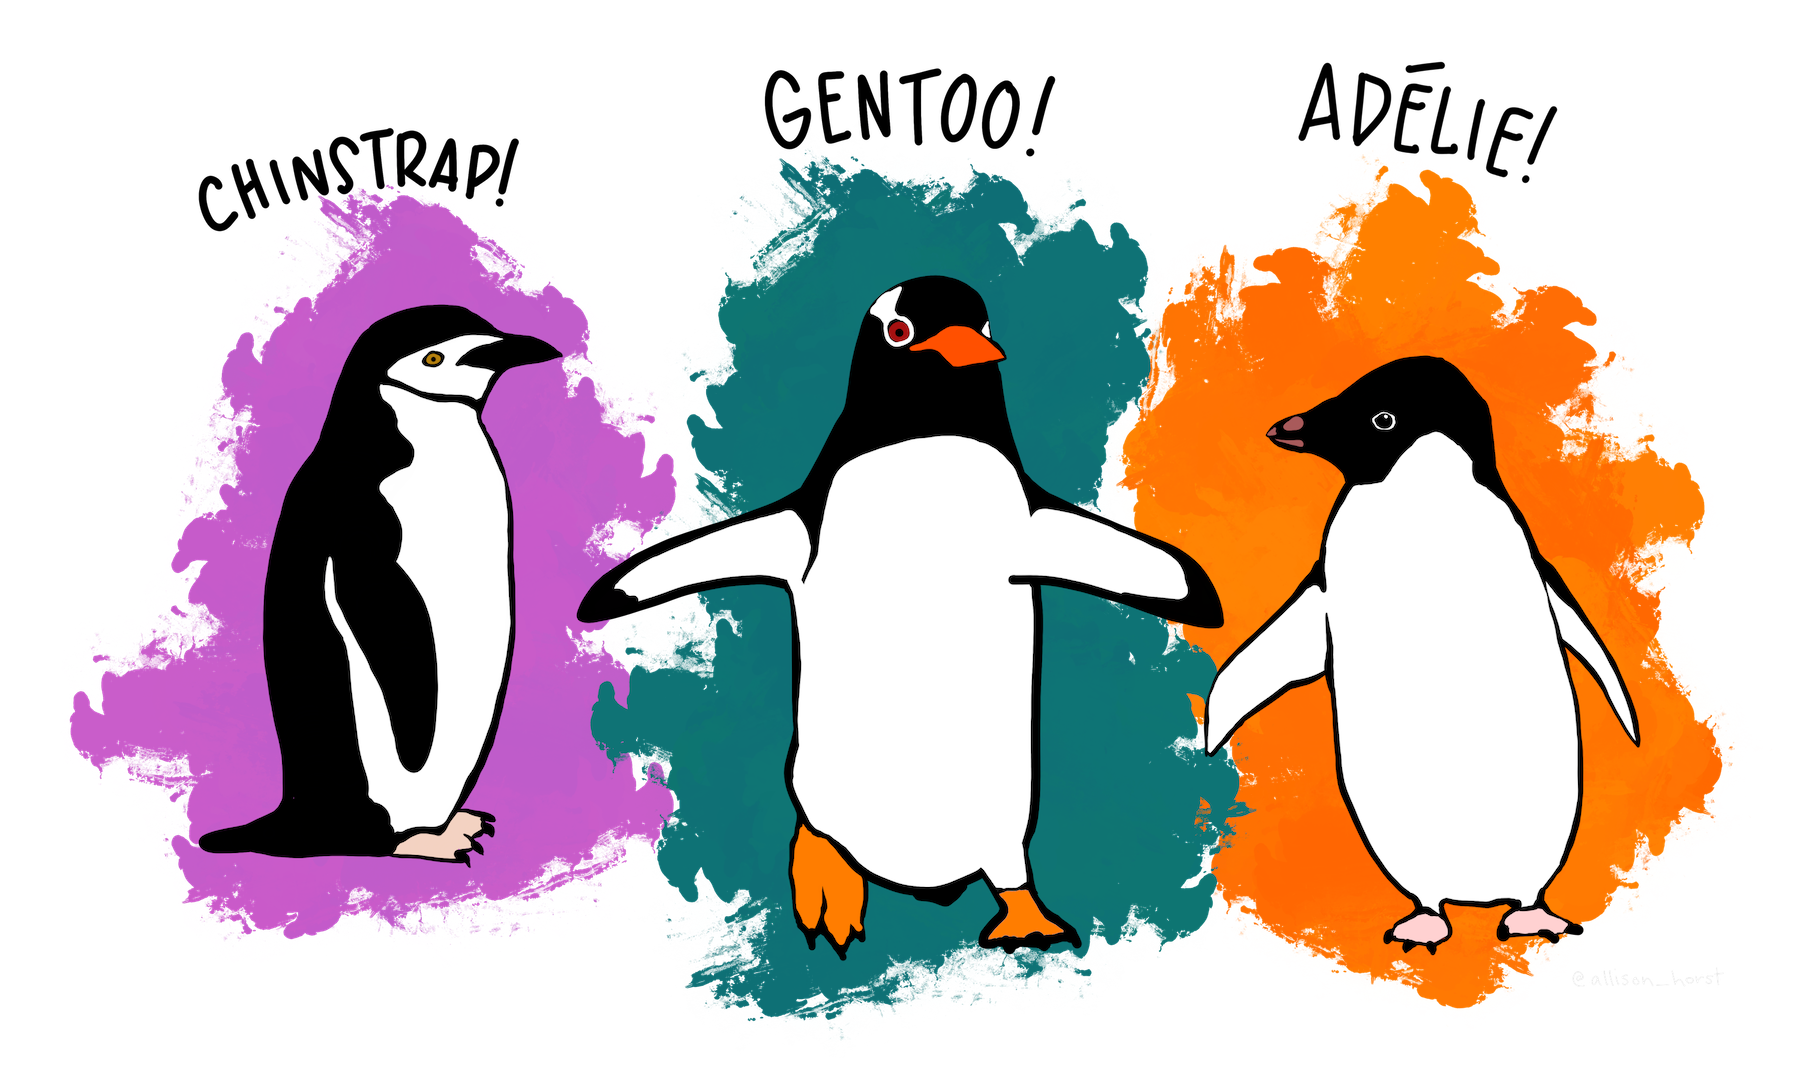

## Loading the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set()

# Read the Stroke dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

## Observing the Data

In [2]:
# A bried look at what the dataset entails
df.iloc[:100]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
95,95,Adelie,Dream,40.8,18.9,208.0,4300.0,Male
96,96,Adelie,Dream,38.1,18.6,190.0,3700.0,Female
97,97,Adelie,Dream,40.3,18.5,196.0,4350.0,Male
98,98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


In [3]:
# Summarizing the quantitative variables
df.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,342.000000,342.000000,342.000000,342.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386
std,99.448479,5.459584,1.974793,14.061714,801.954536
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000


In [4]:
# Summarizing the different values of the qualitative variables
print("The different islands are ",np.unique(df[['island']].values))
print("The different speices outlined in this dataset are ",np.unique(df[['species']].values))
print("The different gender of the penguins are ",np.unique(df[['sex']].values))

The different islands are  ['Biscoe' 'Dream' 'Torgersen']
The different speices outlined in this dataset are  ['Adelie' 'Chinstrap' 'Gentoo']


We notice that we have a combination indices ,quantitative and qualitative data. 

Quantitative Variables - bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass 
Qualitative Variable - island, species, sex
Index - Unnamed: 0 - we plan to delete this variable for a cleaner data frame

The qualitative variables can be converted to boolean datatypes using one hot encoding if needed.

We can also see some NAN which we also plan to drop.




In [5]:
# Counts of our target variables
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Lets see how these species are distributed across the three islands

In [6]:
# checking island data
island_df = pd.DataFrame(
df.groupby(["island", "species"])["island"].count()).rename(columns={"Island": "Count"})
island_df

island
island    species          
Biscoe    Adelie         44
          Gentoo        124
Dream     Adelie         56
          Chinstrap      68
Torgersen Adelie         52

## Cleaning the Data

In [7]:
#df = df.drop('Unnamed: 0', 1)
df = df.dropna()
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...,...
338,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Visualizing the Data

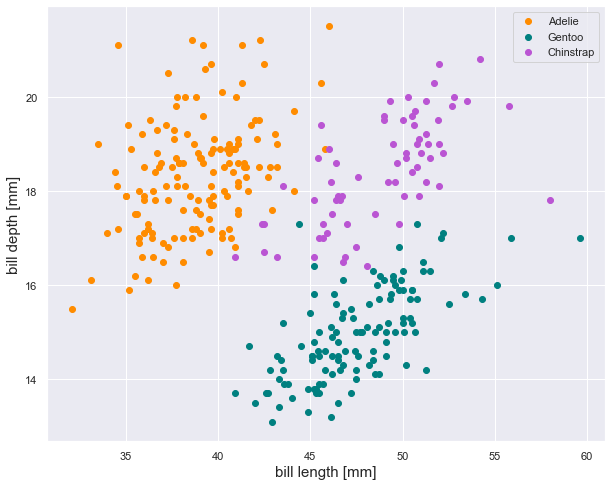

In [8]:
penguins = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["darkorange", "teal", "mediumorchid"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

## Adelie Vs. Gentoo Classification

Consider this; you are a polar ecologist in the freezing island of Biscoe. You are somehow able to get some measurement for a penguin that you're sure is a Gentoo. You take the measurements for bill length and bill depth...but wait? Was it a gentoo? Or maybe it was an adelie? You're confused. The penguin has long since dissapeared but you don't want to lose the hard earned data you just gathered. Maybe a homemade perceptron with some past data can help!

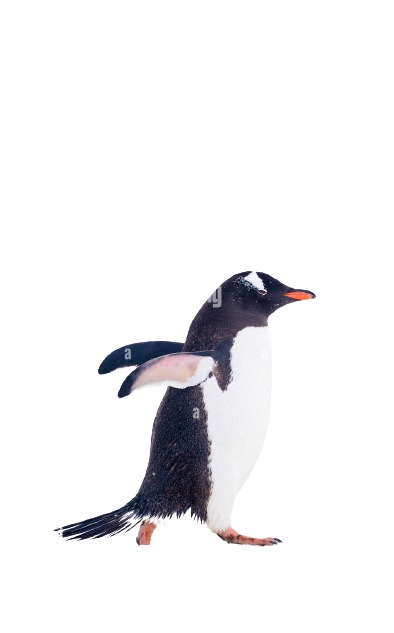

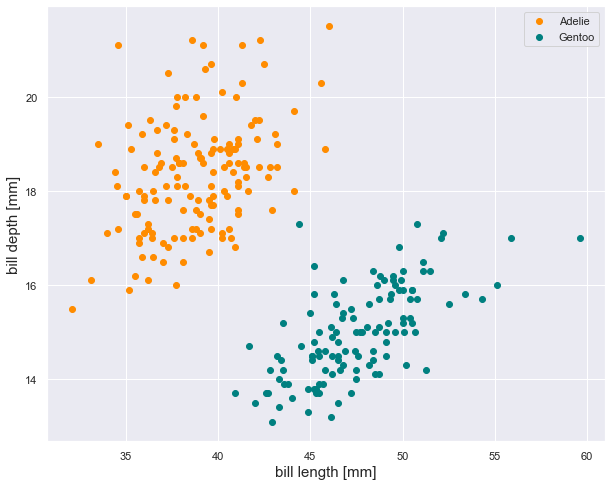

In [9]:
penguins = ["Adelie", "Gentoo"]
colors = ["darkorange", "teal"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

For the most part we can see that the data for each of the penguins is linearly seperable - this should be an easy enough classification task for a simple perceptron. 

In [10]:
#Preparing the data
options = ['Adelie','Gentoo']
df_AG = df[df['species'].isin(options)]

y = df_AG.species.values
y = np.where(y=='Adelie',-1,1)
y[:5]

array([-1, -1, -1, -1, -1])

In [11]:
# Store the desired feature measurements in the matrix X
X = df_AG[[ "bill_length_mm","bill_depth_mm"]].values 
X = X/10

## Building a Perceptron

In [12]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [13]:
from sklearn.model_selection import train_test_split

# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state =42)



In [14]:
# Call the train method to train the weights and bias of the given instance
percep.train(X_train, y_train)

# Predict labels on the features in X
y_hat_train = percep.predict(X_train)

# Compare y_hat and y
print((y_train == y_hat_train))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

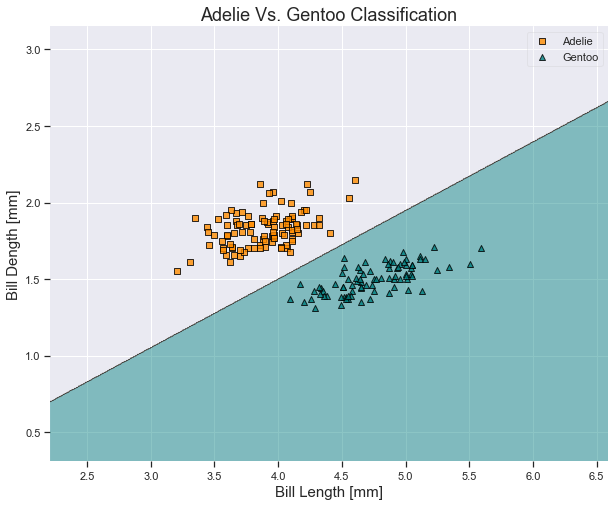

In [15]:
plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_train, y_train, clf = percep,colors='darkorange,teal')
plt.title("Adelie Vs. Gentoo Classification", fontsize = 18)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Dength [mm]", fontsize = 15)

handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Gentoo'], 
           framealpha=0.3, scatterpoints=1)   
        
plt.show()

## Testing the Data

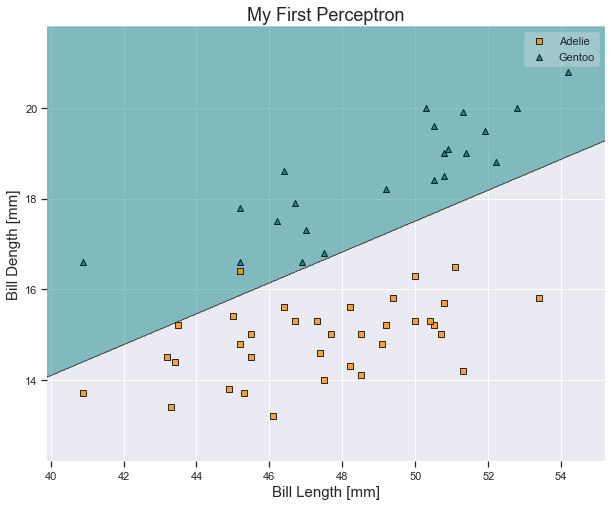

In [22]:
plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_test, y_test, clf = percep, colors='darkorange,teal')
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Dength [mm]", fontsize = 15)

handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Adelie', 'Gentoo'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

## Misclassifican Rate

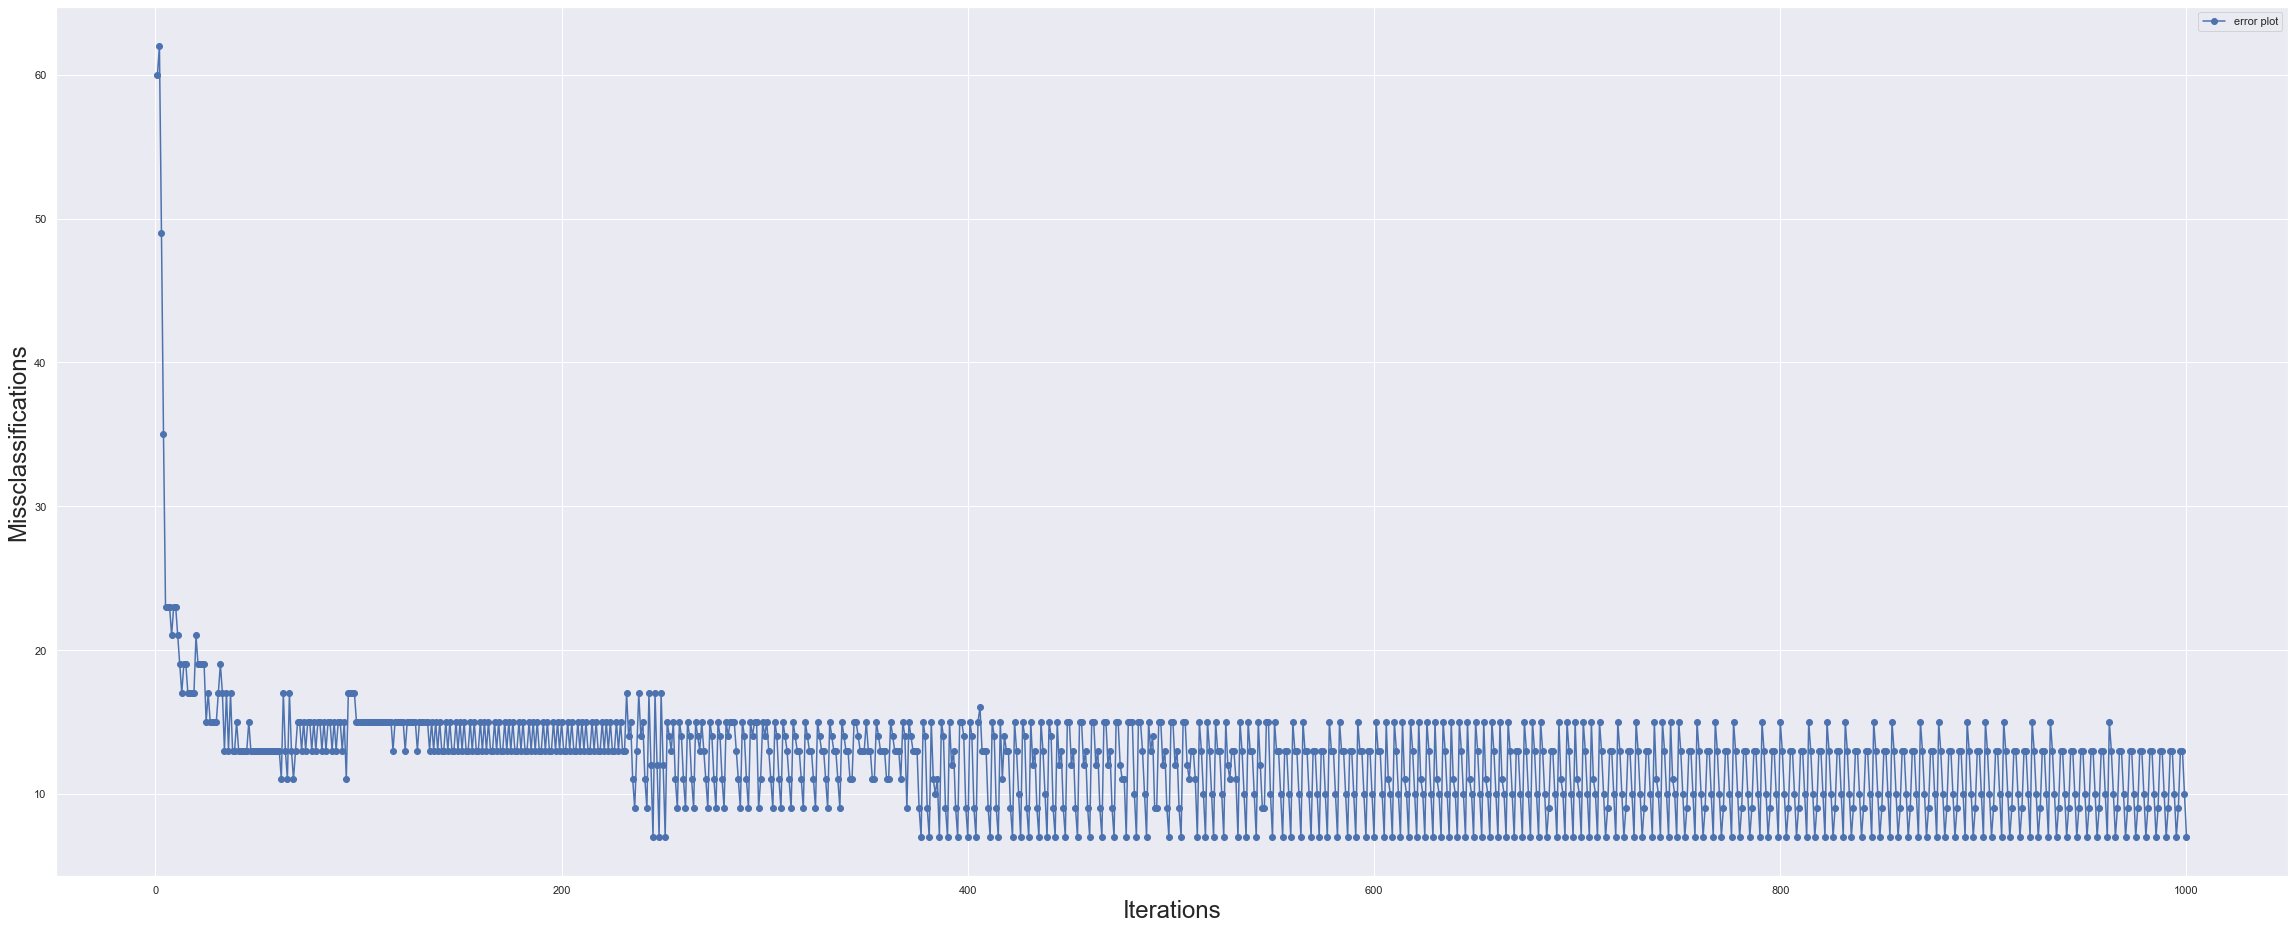

In [32]:
plt.figure(figsize = (40, 16))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations",fontsize=24)
plt.ylabel("Missclassifications",fontsize=24)
plt.legend()
plt.show()

## Gentoo Vs. Chinstrap Classification

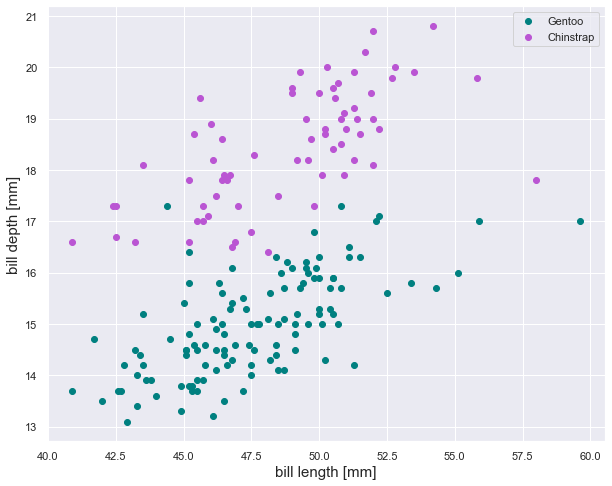

In [24]:
penguins = ["Gentoo", "Chinstrap"]
colors = [ "teal","mediumorchid"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

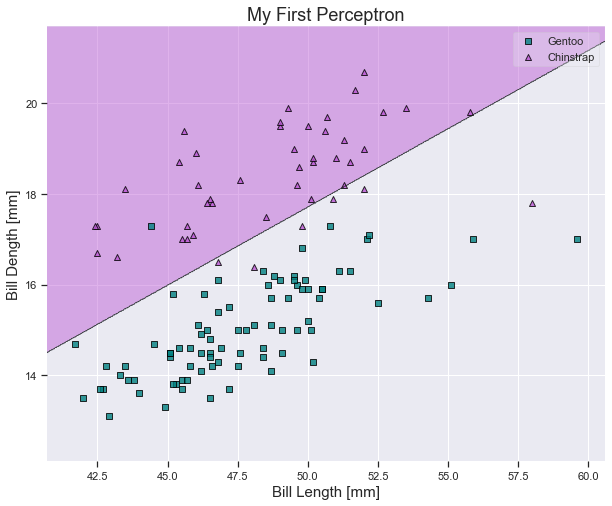

In [25]:
options = ['Gentoo','Chinstrap']
df_AC = df[df['species'].isin(options)]

y = df_AC.species.values
y = np.where(y=='Gentoo',-1,1)

X = df_AC[[ "bill_length_mm","bill_depth_mm"]].values 

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state =42)

percep.train(X_train, y_train)
y_hat_train = percep.predict(X_train)

plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X_train, y_train, clf = percep,colors='teal,mediumorchid')
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Dength [mm]", fontsize = 15)

handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Gentoo', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

## Testing the Perceptron

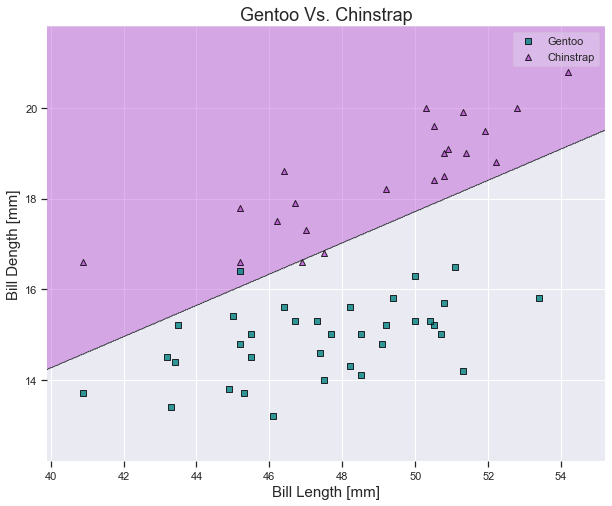

In [26]:
plt.figure(figsize = (10, 8))
ax=plot_decision_regions(X_test, y_test, clf = percep,colors= "teal,mediumorchid")
plt.title("Gentoo Vs. Chinstrap", fontsize = 18)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Dength [mm]", fontsize = 15)

handles, labels = ax.get_legend_handles_labels()           
ax.legend(handles, 
          ['Gentoo', 'Chinstrap'], 
           framealpha=0.3, scatterpoints=1)

plt.show()

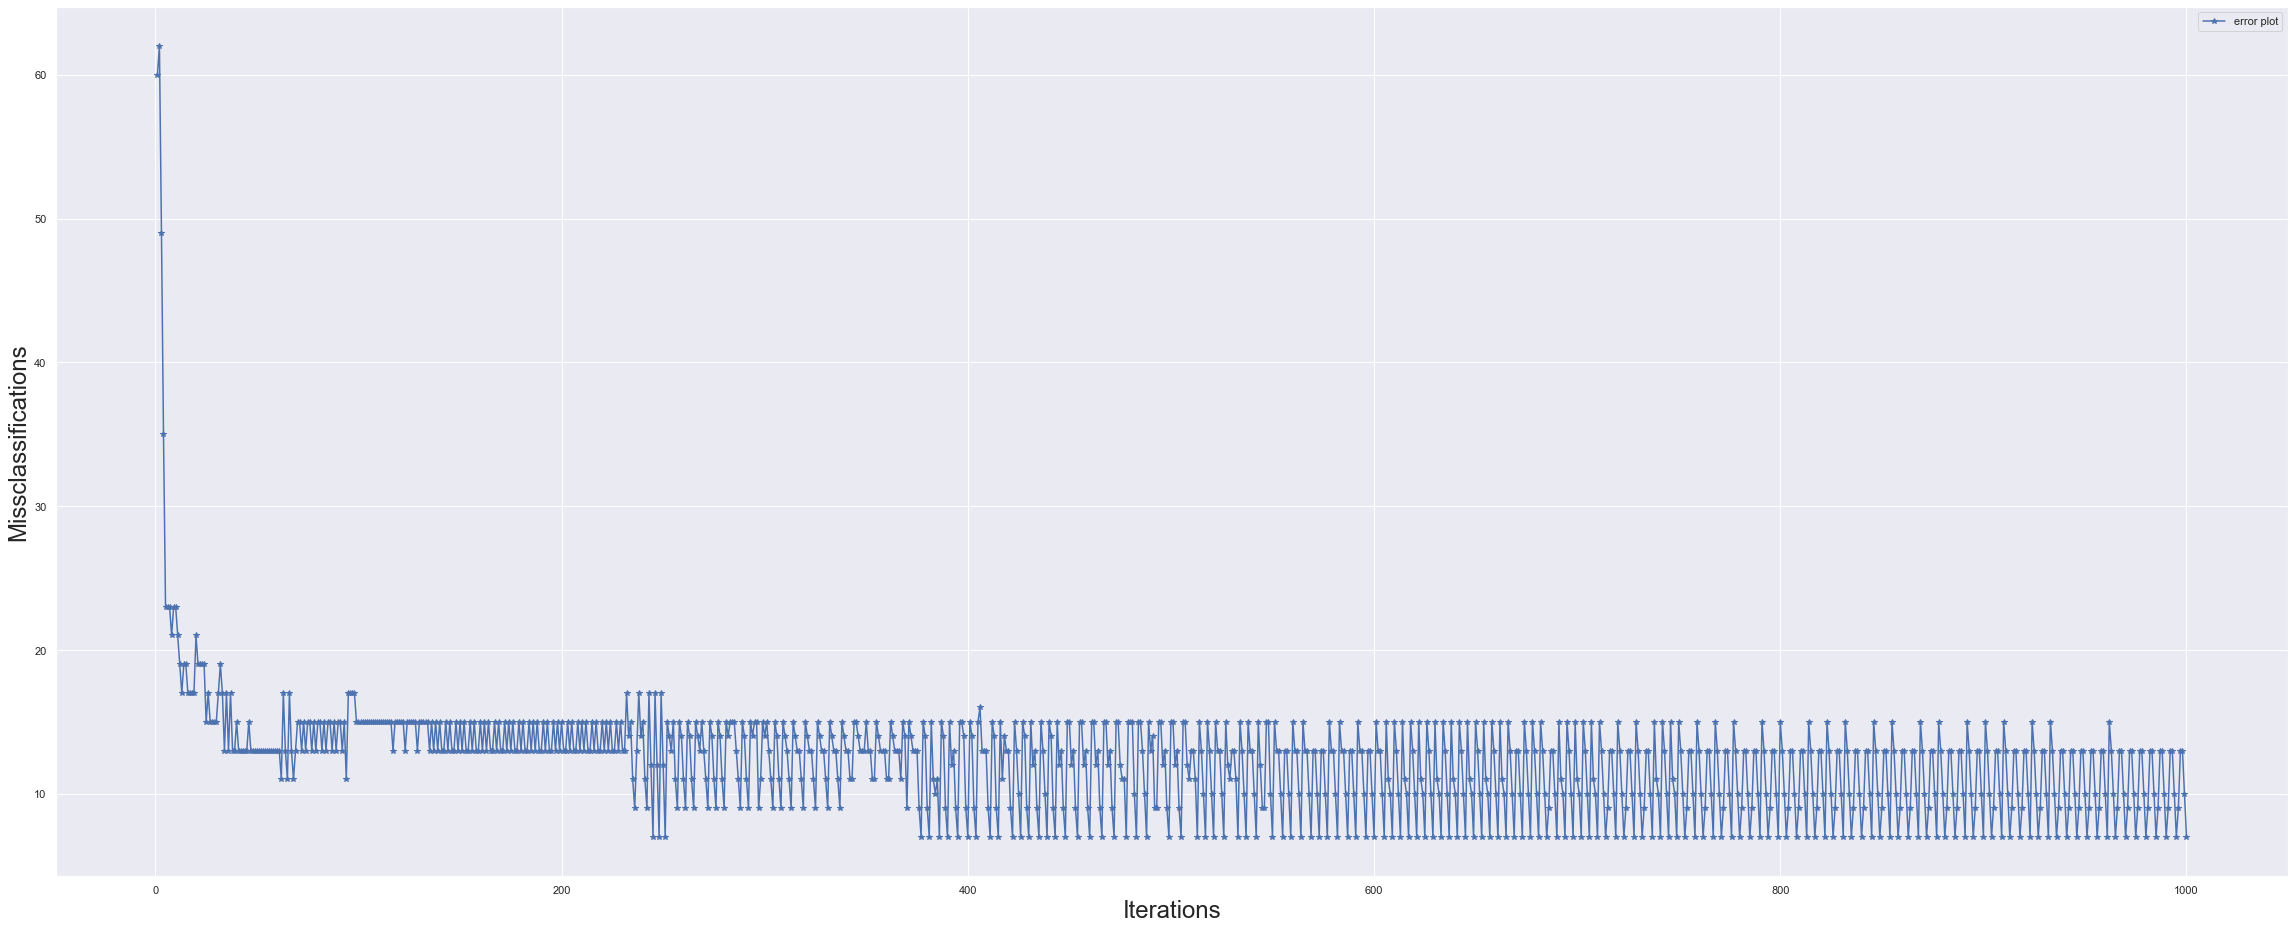

In [35]:
plt.figure(figsize = (40, 16))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "*",
         label = "error plot",)
plt.xlabel("Iterations",fontsize=24)
plt.ylabel("Missclassifications",fontsize=24)
plt.legend()
plt.show()